In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
import splitfolders
input_folder= ''
#Train, val, test
splitfolders.ratio(input_folder,output='',
seed=42, ratio=(.7, .2,.1),
group_prefix=None) # default values

In [14]:
picture_size = 48
folder_path = "D:\SIM\level 3\advanced multimedia\final project\CK+48"

Displaying Images

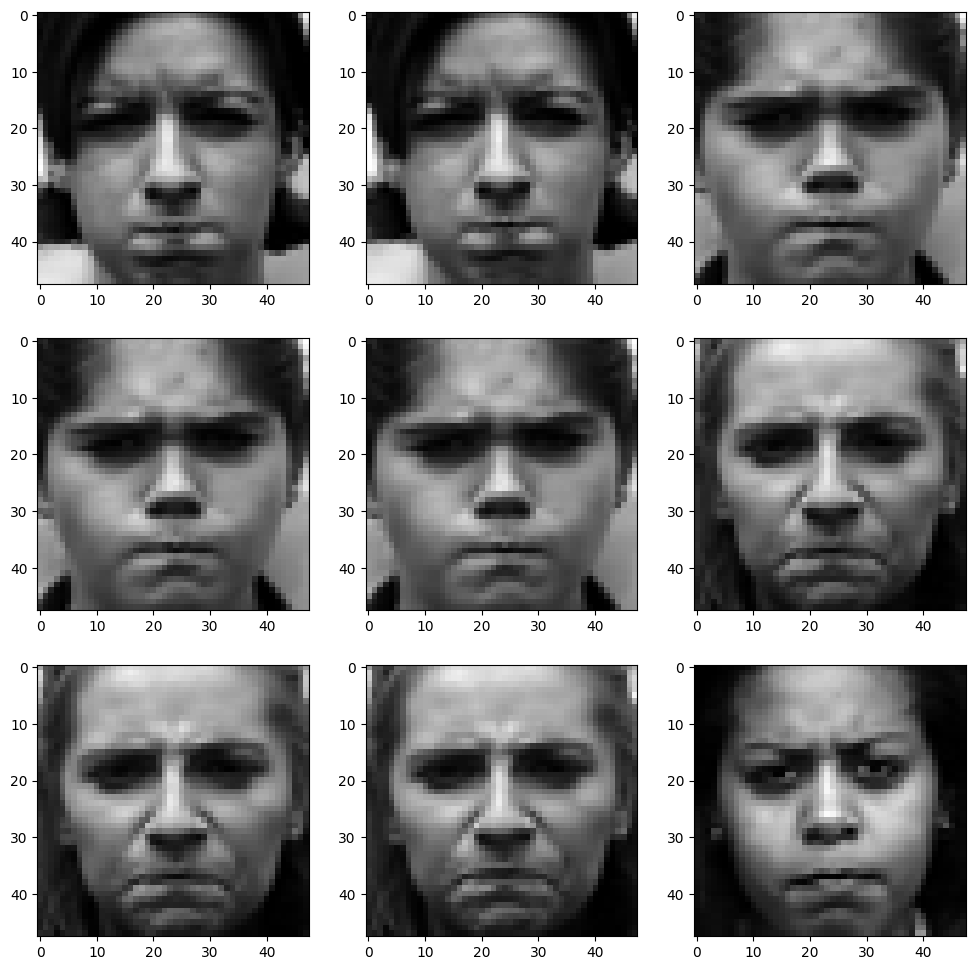

In [10]:
directory = './ck/CK+48/anger'
file_list = os.listdir(directory)

plt.figure(figsize=(12, 12))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img_path = os.path.join(directory, file_list[i])
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.imshow(img)   

plt.show()


Making Training and Validation Data

In [5]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory( 'D:/SIM 3/Advanced Multimedia/Final project/dataset/train',
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


val_set = datagen_val.flow_from_directory( 'D:/SIM 3/Advanced Multimedia/Final project/dataset/val',
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 682 images belonging to 7 classes.


Found 193 images belonging to 7 classes.


Model Building

In [5]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

Fitting the Model with Training and Validation Data

In [6]:
checkpoint = ModelCheckpoint('D:/SIM 3/Advanced Multimedia/Final project/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])


In [7]:

# Assuming train_set and test_set are ImageDataGenerators
steps_per_epoch = train_set.samples // train_set.batch_size
validation_steps = test_set.samples // test_set.batch_size

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

history = model.fit_generator(
    generator=train_set,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=validation_steps,
    callbacks=callbacks_list
)


C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_69512\3178675698.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/48



5/5 [==============================] - ETA: 0s - loss: 2.0782 - accuracy: 0.2527WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 30s 5s/step - loss: 2.0782 - accuracy: 0.2527 - val_loss: 22.3470 - val_accuracy: 0.1981 - lr: 0.0010
Epoch 2/48
5/5 [==============================] - ETA: 0s - loss: 1.5613 - accuracy: 0.4549WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 10s 2s/step - loss: 1.5613 - accuracy: 0.4549 - val_loss: 18.2352 - val_accuracy: 0.3585 - lr: 0.0010
Epoch 3/48
5/5 [==============================] - ETA: 0s - loss: 1.1692 - accuracy: 0.5957WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 1.1692 - accuracy: 0.5957 - val_loss: 14.9543 - val_accuracy: 0.2736 - lr: 0.0010
Epoch 4/48
5/5 [==============================] - ETA: 0s - loss: 1.0400 - accuracy: 0.6354WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 1.0400 - accuracy: 0.6354 - val_loss: 12.4268 - val_accuracy: 0.2075 - lr: 0.0010
Epoch 5/48
5/5 [==============================] - ETA: 0s - loss: 0.7951 - accuracy: 0.7094WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.7951 - accuracy: 0.7094 - val_loss: 14.0363 - val_accuracy: 0.2075 - lr: 0.0010
Epoch 6/48
5/5 [==============================] - ETA: 0s - loss: 0.6963 - accuracy: 0.7563WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.6963 - accuracy: 0.7563 - val_loss: 14.8609 - val_accuracy: 0.2830 - lr: 0.0010
Epoch 7/48
5/5 [==============================] - ETA: 0s - loss: 0.6210 - accuracy: 0.7719WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 10s 2s/step - loss: 0.6210 - accuracy: 0.7719 - val_loss: 6.7449 - val_accuracy: 0.4151 - lr: 0.0010
Epoch 8/48
5/5 [==============================] - ETA: 0s - loss: 0.5262 - accuracy: 0.8285WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 10s 2s/step - loss: 0.5262 - accuracy: 0.8285 - val_loss: 5.5936 - val_accuracy: 0.4434 - lr: 0.0010
Epoch 9/48
5/5 [==============================] - ETA: 0s - loss: 0.4347 - accuracy: 0.8375WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.4347 - accuracy: 0.8375 - val_loss: 5.0480 - val_accuracy: 0.4717 - lr: 0.0010
Epoch 10/48
5/5 [==============================] - ETA: 0s - loss: 0.4224 - accuracy: 0.8502WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.4224 - accuracy: 0.8502 - val_loss: 4.7935 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 11/48
5/5 [==============================] - ETA: 0s - loss: 0.3375 - accuracy: 0.8917WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.3375 - accuracy: 0.8917 - val_loss: 4.9318 - val_accuracy: 0.4434 - lr: 0.0010
Epoch 12/48
5/5 [==============================] - ETA: 0s - loss: 0.2828 - accuracy: 0.9224WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.2828 - accuracy: 0.9224 - val_loss: 4.5492 - val_accuracy: 0.4717 - lr: 0.0010
Epoch 13/48
5/5 [==============================] - ETA: 0s - loss: 0.2569 - accuracy: 0.9152WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.2569 - accuracy: 0.9152 - val_loss: 2.3875 - val_accuracy: 0.6887 - lr: 0.0010
Epoch 14/48
5/5 [==============================] - ETA: 0s - loss: 0.2271 - accuracy: 0.9206WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.2271 - accuracy: 0.9206 - val_loss: 1.9977 - val_accuracy: 0.6887 - lr: 0.0010
Epoch 15/48
5/5 [==============================] - ETA: 0s - loss: 0.2005 - accuracy: 0.9404WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.2005 - accuracy: 0.9404 - val_loss: 1.8721 - val_accuracy: 0.6887 - lr: 0.0010
Epoch 16/48
5/5 [==============================] - ETA: 0s - loss: 0.1716 - accuracy: 0.9531WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 10s 2s/step - loss: 0.1716 - accuracy: 0.9531 - val_loss: 1.3635 - val_accuracy: 0.6887 - lr: 0.0010
Epoch 17/48
5/5 [==============================] - ETA: 0s - loss: 0.1633 - accuracy: 0.9422WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.1633 - accuracy: 0.9422 - val_loss: 1.6970 - val_accuracy: 0.6887 - lr: 0.0010
Epoch 18/48
5/5 [==============================] - ETA: 0s - loss: 0.1316 - accuracy: 0.9603WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.1316 - accuracy: 0.9603 - val_loss: 1.0323 - val_accuracy: 0.7075 - lr: 0.0010
Epoch 19/48
5/5 [==============================] - ETA: 0s - loss: 0.1206 - accuracy: 0.9675WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.1206 - accuracy: 0.9675 - val_loss: 0.8700 - val_accuracy: 0.7736 - lr: 0.0010
Epoch 20/48
5/5 [==============================] - ETA: 0s - loss: 0.1117 - accuracy: 0.9729WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.1117 - accuracy: 0.9729 - val_loss: 1.0043 - val_accuracy: 0.7453 - lr: 0.0010
Epoch 21/48
5/5 [==============================] - ETA: 0s - loss: 0.1184 - accuracy: 0.9547WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 10s 2s/step - loss: 0.1184 - accuracy: 0.9547 - val_loss: 0.5108 - val_accuracy: 0.8302 - lr: 0.0010
Epoch 22/48
5/5 [==============================] - ETA: 0s - loss: 0.0961 - accuracy: 0.9657WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.0961 - accuracy: 0.9657 - val_loss: 0.3996 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 23/48
5/5 [==============================] - ETA: 0s - loss: 0.0890 - accuracy: 0.9719WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 10s 2s/step - loss: 0.0890 - accuracy: 0.9719 - val_loss: 0.3419 - val_accuracy: 0.8679 - lr: 0.0010
Epoch 24/48
5/5 [==============================] - ETA: 0s - loss: 0.0797 - accuracy: 0.9819WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.0797 - accuracy: 0.9819 - val_loss: 0.5050 - val_accuracy: 0.8302 - lr: 0.0010
Epoch 25/48
5/5 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.9641WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 10s 2s/step - loss: 0.0947 - accuracy: 0.9641 - val_loss: 0.1432 - val_accuracy: 0.9434 - lr: 0.0010
Epoch 26/48
5/5 [==============================] - ETA: 0s - loss: 0.0765 - accuracy: 0.9657WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.0765 - accuracy: 0.9657 - val_loss: 0.2673 - val_accuracy: 0.9151 - lr: 0.0010
Epoch 27/48
5/5 [==============================] - ETA: 0s - loss: 0.0817 - accuracy: 0.9729WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.0817 - accuracy: 0.9729 - val_loss: 0.1099 - val_accuracy: 0.9528 - lr: 0.0010
Epoch 28/48
5/5 [==============================] - ETA: 0s - loss: 0.0459 - accuracy: 0.9892WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.0459 - accuracy: 0.9892 - val_loss: 0.6390 - val_accuracy: 0.8491 - lr: 0.0010
Epoch 29/48
5/5 [==============================] - ETA: 0s - loss: 0.0776 - accuracy: 0.9657WARNING:tensorflow:Can save best model only with val_acc available, skipping.


5/5 [==============================] - 9s 2s/step - loss: 0.0776 - accuracy: 0.9657 - val_loss: 0.1118 - val_accuracy: 0.9528 - lr: 0.0010
Epoch 30/48
5/5 [==============================] - ETA: 0s - loss: 0.0933 - accuracy: 0.9711Restoring model weights from the end of the best epoch: 27.



Epoch 30: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
5/5 [==============================] - 9s 2s/step - loss: 0.0933 - accuracy: 0.9711 - val_loss: 0.1268 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 30: early stopping


Plotting Accuracy & Loss

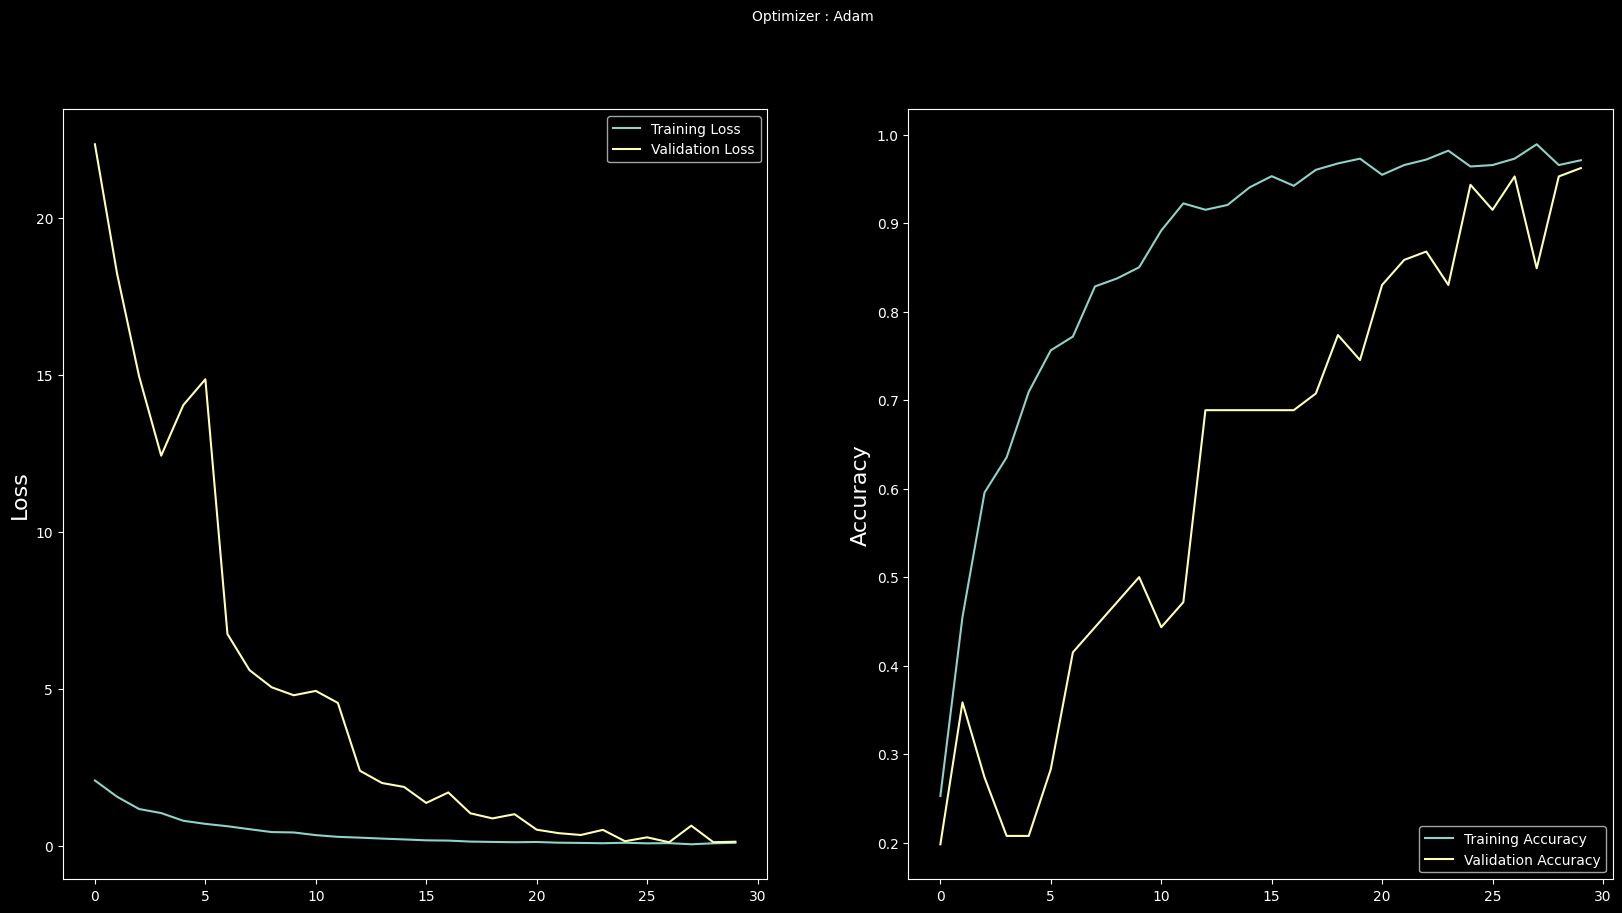

In [8]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier(r'D:\SIM 3\Advanced Multimedia\Final project\haarcascade_frontalface_default.xml')
classifier =load_model(r'D:\SIM 3\Advanced Multimedia\Final project\model.h5')

emotion_labels = ['Anger','contempt','disgust','fear','happy', 'Sadness', 'Surprise']

cap = cv2.VideoCapture(0)



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()